In [4]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

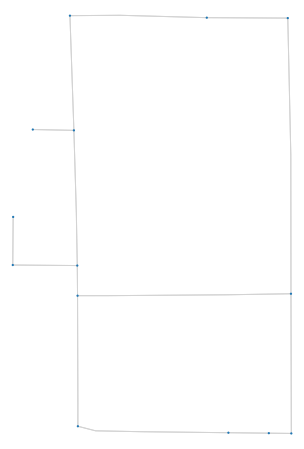

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
north, south, east, west = 35.581702,35.584546,-78.800222,-78.797915
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

In [6]:
list(G.nodes(data=True))[2]

(195438631,
 {'y': 35.5843317,
  'x': -78.7982923,
  'highway': 'traffic_signals',
  'street_count': 4})

In [7]:
list(G.edges(data=True))[1]

(195438253,
 195594836,
 {'osmid': 325021546,
  'lanes': '2',
  'ref': 'US 401',
  'name': 'South Main Street',
  'highway': 'primary',
  'maxspeed': '25 mph',
  'oneway': False,
  'length': 82.574,
  'geometry': <shapely.geometry.linestring.LineString at 0x2b5a624cc40>})

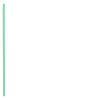

In [8]:
list(G.edges(data=True))[1][2]['geometry']

In [80]:
import pandas as pd
df1 = pd.read_csv("Smallbox.csv")

In [81]:
df1

,Nodes,Latitude,Longitude
0,195438253,35.582010,-78.799760
1,195438255,35.581969,-78.798268
2,195438631,35.584332,-78.798292
3,195447516,35.582924,-78.799764
4,195447518,35.583693,-78.799788
5,195447520,35.584345,-78.799816
6,195500922,35.582764,-78.798270
7,195594836,35.582753,-78.799763
8,6359366687,35.584334,-78.798859
9,7463971107,35.583698,-78.800076


In [84]:
order1 = [8,5,4,9,11,10,3,7,0,13,12,1,6,2]

In [85]:
df1['ID'] = df1.index

In [86]:
df1

,Nodes,Latitude,Longitude,ID
0,195438253,35.582010,-78.799760,0
1,195438255,35.581969,-78.798268,1
2,195438631,35.584332,-78.798292,2
3,195447516,35.582924,-78.799764,3
4,195447518,35.583693,-78.799788,4
5,195447520,35.584345,-78.799816,5
6,195500922,35.582764,-78.798270,6
7,195594836,35.582753,-78.799763,7
8,6359366687,35.584334,-78.798859,8
9,7463971107,35.583698,-78.800076,9


In [93]:
df2 = pd.DataFrame()

In [106]:
for i in order1:
    #print(df1.loc[i])
    df2.append(df1.loc[i])

In [107]:
df2

""


In [109]:
df3 = pd.DataFrame()

In [117]:
df3 = df1.head(0)

In [119]:
df3.append(df1.loc[8])

,Nodes,Latitude,Longitude,ID
8,6.359367e+09,35.584334,-78.798859,8.0


In [194]:
df2 = pd.DataFrame()
df2 = df1.head(0)

In [195]:
for i in order1:
    #print(df1.loc[i])
    df2 = df2.append(df1.loc[i])

In [196]:
order1

[8, 5, 4, 9, 11, 10, 3, 7, 0, 13, 12, 1, 6, 2]

In [197]:
df2

,Nodes,Latitude,Longitude,ID
8,6.359367e+09,35.584334,-78.798859,8.0
5,1.954475e+08,35.584345,-78.799816,5.0
4,1.954475e+08,35.583693,-78.799788,4.0
9,7.463971e+09,35.583698,-78.800076,9.0
11,7.472627e+09,35.583201,-78.800213,11.0
10,7.472627e+09,35.582927,-78.800216,10.0
3,1.954475e+08,35.582924,-78.799764,3.0
7,1.955948e+08,35.582753,-78.799763,7.0
0,1.954383e+08,35.582010,-78.799760,0.0
13,8.739205e+09,35.581973,-78.798708,13.0


In [198]:
def plot_path(lat, long, origin_point, destination_point):
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'grey')))
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    fig.update_layout(mapbox_style="carto-darkmatter",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [199]:
df2

,Nodes,Latitude,Longitude,ID
8,6.359367e+09,35.584334,-78.798859,8.0
5,1.954475e+08,35.584345,-78.799816,5.0
4,1.954475e+08,35.583693,-78.799788,4.0
9,7.463971e+09,35.583698,-78.800076,9.0
11,7.472627e+09,35.583201,-78.800213,11.0
10,7.472627e+09,35.582927,-78.800216,10.0
3,1.954475e+08,35.582924,-78.799764,3.0
7,1.955948e+08,35.582753,-78.799763,7.0
0,1.954383e+08,35.582010,-78.799760,0.0
13,8.739205e+09,35.581973,-78.798708,13.0


In [200]:
df2.reset_index(inplace = True)

In [201]:
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])

In [202]:
df2.loc[0]["Longitude"]

-78.7988587

In [203]:
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.loc[13]["Latitude"], df2.loc[13]["Longitude"])

In [204]:
plot_path(lat, long, origin_point, destination_point)

In [205]:
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"])

In [206]:
plot_path(lat, long, origin_point, destination_point)

In [208]:
df2

,index,Nodes,Latitude,Longitude,ID
0,8,6.359367e+09,35.584334,-78.798859,8.0
1,5,1.954475e+08,35.584345,-78.799816,5.0
2,4,1.954475e+08,35.583693,-78.799788,4.0
3,9,7.463971e+09,35.583698,-78.800076,9.0
4,11,7.472627e+09,35.583201,-78.800213,11.0
5,10,7.472627e+09,35.582927,-78.800216,10.0
6,3,1.954475e+08,35.582924,-78.799764,3.0
7,7,1.955948e+08,35.582753,-78.799763,7.0
8,0,1.954383e+08,35.582010,-78.799760,0.0
9,13,8.739205e+09,35.581973,-78.798708,13.0


In [234]:
df4 = df2.copy(deep=True)

In [235]:
df4

,index,Nodes,Latitude,Longitude,ID
0,8,6.359367e+09,35.584334,-78.798859,8.0
1,5,1.954475e+08,35.584345,-78.799816,5.0
2,4,1.954475e+08,35.583693,-78.799788,4.0
3,9,7.463971e+09,35.583698,-78.800076,9.0
4,11,7.472627e+09,35.583201,-78.800213,11.0
5,10,7.472627e+09,35.582927,-78.800216,10.0
6,3,1.954475e+08,35.582924,-78.799764,3.0
7,7,1.955948e+08,35.582753,-78.799763,7.0
8,0,1.954383e+08,35.582010,-78.799760,0.0
9,13,8.739205e+09,35.581973,-78.798708,13.0


In [236]:
df4 = df4.append(df1.loc[8])

In [237]:
df4

,index,Nodes,Latitude,Longitude,ID
0,8.0,6.359367e+09,35.584334,-78.798859,8.0
1,5.0,1.954475e+08,35.584345,-78.799816,5.0
2,4.0,1.954475e+08,35.583693,-78.799788,4.0
3,9.0,7.463971e+09,35.583698,-78.800076,9.0
4,11.0,7.472627e+09,35.583201,-78.800213,11.0
5,10.0,7.472627e+09,35.582927,-78.800216,10.0
6,3.0,1.954475e+08,35.582924,-78.799764,3.0
7,7.0,1.955948e+08,35.582753,-78.799763,7.0
8,0.0,1.954383e+08,35.582010,-78.799760,0.0
9,13.0,8.739205e+09,35.581973,-78.798708,13.0


In [241]:
df4.reset_index(inplace = True)
long1 = [] 
lat1 = []  
for i in df4.index:
    long1.append(df4.loc[i]["Longitude"])
    lat1.append(df4.loc[i]["Latitude"])

In [244]:
origin_point = (df4.loc[0]["Latitude"], df4.loc[0]["Longitude"]) 
destination_point = (df4.loc[0]["Latitude"], df4.loc[0]["Longitude"])

In [245]:
plot_path(lat1, long1, origin_point, destination_point)

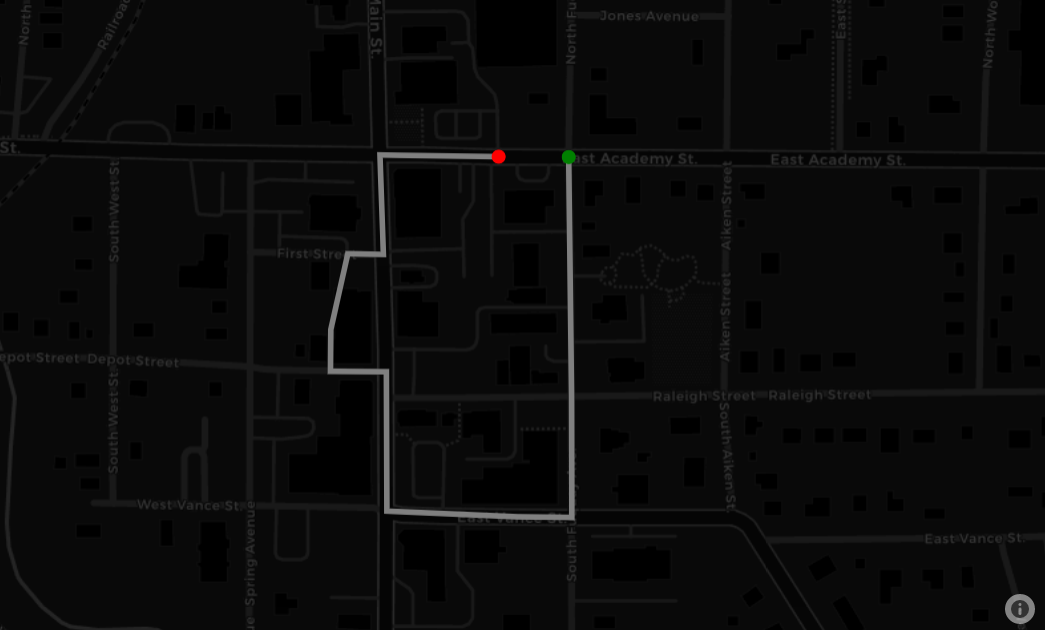

In [1]:
from IPython.display import Image
#Output for line 204 due to Graph not being visible in GitHub
Image(filename = "pathnotebook1.png", width = 600, height = 300)

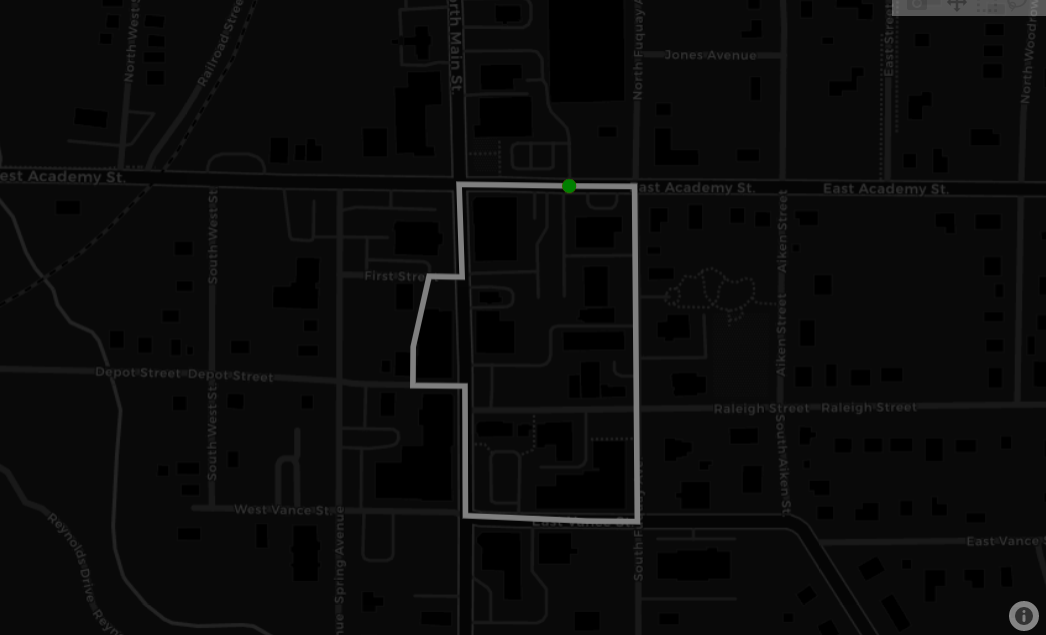

In [2]:
#Output for line 245
Image(filename = "pathnotebook2.png", width = 600, height = 300)